In [1]:
%run useful_functions.py

C:\Users\natha\Desktop\17-Cyber-risk_and_the_cross-section_of_stock_returns-main\17-Cyber-risk_and_the_cross-section_of_stock_returns-main\Work_Nathan\useful_functions.py:951: SyntaxWarning: invalid escape sequence '\s'
  item1A = re.sub('\s{2,}',' ', item1A)
C:\Users\natha\Desktop\17-Cyber-risk_and_the_cross-section_of_stock_returns-main\17-Cyber-risk_and_the_cross-section_of_stock_returns-main\Work_Nathan\useful_functions.py:962: SyntaxWarning: invalid escape sequence '\s'
  document = re.sub('\s{2,}',' ', document)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\natha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


update 22


In [2]:
import pickle

## Cyber score definition

In [3]:
file_path = 'cyber_scores_dataframes/cyber_template_overall.csv.gz'
overall_cyberscore=pd.read_csv(file_path)
overall_cyberscore.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
overall_cyberscore.set_index('date', inplace=True)

In [4]:
file_path = 'cyber_scores_dataframes/cyber_template_sentiment.csv.gz'
sentiment_cyberscore=pd.read_csv(file_path)
sentiment_cyberscore.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
sentiment_cyberscore.set_index('date', inplace=True)

In [5]:
#4 cyber score
liste_tactic_ordered=['Preparation and Reconaissance','Persistence and Evasion','Credential Movement','Command and Data Manipulation']

super_cyber_score_dict={}
for tac in liste_tactic_ordered:
    name=tac.replace(" ", "_").lower()

    file_path = 'cyber_scores_dataframes/super/cyber_template_'+name+'.csv.gz'
    temp_cyberscore=pd.read_csv(file_path)
    temp_cyberscore.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
    temp_cyberscore.set_index('date', inplace=True)

    super_cyber_score_dict[name]=temp_cyberscore

In [6]:
#14 cyber score
liste_tactic_ordered=['Persistence',
 'Command_and_Control',
 'Impact',
 'Initial_Access',
 'Resource_Development',
 'Collection',
 'Exfiltration',
 'Credential_Access',
 'Privilege_Escalation',
 'Execution',
 'Defense_Evasion',
 'Reconnaissance',
 'Lateral_Movement',
 'Discovery']



sub_cyber_score_dict={}
for tac in liste_tactic_ordered:
    name=tac.replace(" ", "_").lower()

    file_path = 'cyber_scores_dataframes/14/cyber_template_'+name+'.csv.gz'
    temp_cyberscore=pd.read_csv(file_path)
    temp_cyberscore.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
    temp_cyberscore.set_index('date', inplace=True)

    sub_cyber_score_dict[name]=temp_cyberscore

In [7]:
cyberscore_all_dict={**sub_cyber_score_dict, **super_cyber_score_dict}
cyberscore_all_dict["Overall"]=overall_cyberscore
cyberscore_all_dict["Sentiment"]=sentiment_cyberscore

## Portfolios definition 

In [8]:
def all_P1_P5_portfolio_for_all_cyberscore():
    dict_P1_P5_returns={}
    dict_P1_P5_composition={}
    dict_P1_P5_caps={}
    for name_cyber in tqdm(cyberscore_all_dict.keys(), desc="Processing..."):
        # Define the file path
        file_path1 = os.path.join("results_pipeline/", 'portfolio_returns_P1_to_P5_' + name_cyber.replace(" ", "_") + '.csv')
        file_path2 = os.path.join("results_pipeline/", 'portfolio_composition_P1_to_P5_' + name_cyber.replace(" ", "_") + '.csv')
        file_path3 = os.path.join("results_pipeline/", 'portfolio_caps_P1_to_P5_' + name_cyber.replace(" ", "_") + '.csv')
        
        # Check if the file already exists
        if os.path.isfile(file_path1) and os.path.isfile(file_path2) and os.path.isfile(file_path3):
            
            output_portfolio_returns_P1_to_P5 = pd.read_csv(file_path1)
            output_portfolio_composition_P1_to_P5 = pd.read_csv(file_path2)
            output_portfolio_caps_P1_to_P5 = pd.read_csv(file_path3)
            
            output_portfolio_returns_P1_to_P5.set_index('date', inplace=True)
            output_portfolio_composition_P1_to_P5.set_index('date', inplace=True)
            output_portfolio_caps_P1_to_P5.set_index('date', inplace=True)
            
        else:
            
            output_portfolio_returns_P1_to_P5, output_portfolio_composition_P1_to_P5,output_portfolio_caps_P1_to_P5 = cyber_portfolio(cyberscore_all_dict[name_cyber])
            output_portfolio_returns_P1_to_P5.to_csv(file_path1)
            output_portfolio_composition_P1_to_P5.to_csv(file_path2)
            output_portfolio_caps_P1_to_P5.to_csv(file_path3)

        dict_P1_P5_returns[name_cyber]=output_portfolio_returns_P1_to_P5
        dict_P1_P5_composition[name_cyber]=output_portfolio_composition_P1_to_P5
        dict_P1_P5_caps[name_cyber]=output_portfolio_caps_P1_to_P5

    return dict_P1_P5_returns, dict_P1_P5_composition, dict_P1_P5_caps
            

In [9]:
#cyber_portfolio_20(cyberscore_all_dict[NAME_OF_CYBERSCORE_TO_ANALYSE])
def all_P1_P20_portfolio_for_all_cyberscore():
    dict_P1_P20_returns={}
    dict_P1_P20_composition={}
    dict_P1_P20_caps={}
    for name_cyber in tqdm(cyberscore_all_dict.keys(), desc="Processing..."):
        # Define the file path
        file_path1 = os.path.join("results_pipeline/", 'portfolio_returns_P1_to_P20_' + name_cyber.replace(" ", "_") + '.csv')
        file_path2 = os.path.join("results_pipeline/", 'portfolio_composition_P1_to_P20_' + name_cyber.replace(" ", "_") + '.csv')
        file_path3 = os.path.join("results_pipeline/", 'portfolio_caps_P1_to_P20_' + name_cyber.replace(" ", "_") + '.csv')
        
        # Check if the file already exists
        if os.path.isfile(file_path1) and os.path.isfile(file_path2) and os.path.isfile(file_path3):
            
            output_portfolio_returns_P1_to_P20 = pd.read_csv(file_path1)
            output_portfolio_composition_P1_to_P20 = pd.read_csv(file_path2)
            output_portfolio_caps_P1_to_P20 = pd.read_csv(file_path3)
            
            output_portfolio_returns_P1_to_P20.set_index('date', inplace=True)
            output_portfolio_composition_P1_to_P20.set_index('date', inplace=True)
            output_portfolio_caps_P1_to_P20.set_index('date', inplace=True)
            
        else:
            
            output_portfolio_returns_P1_to_P20, output_portfolio_composition_P1_to_P20,_,output_portfolio_caps_P1_to_P20 = cyber_portfolio_20(cyberscore_all_dict[name_cyber])
            output_portfolio_returns_P1_to_P20.to_csv(file_path1)
            output_portfolio_composition_P1_to_P20.to_csv(file_path2)
            output_portfolio_caps_P1_to_P20.to_csv(file_path3)

        dict_P1_P20_returns[name_cyber]=output_portfolio_returns_P1_to_P20
        dict_P1_P20_composition[name_cyber]=output_portfolio_composition_P1_to_P20
        dict_P1_P20_caps[name_cyber]=output_portfolio_caps_P1_to_P20

    return dict_P1_P20_returns, dict_P1_P20_composition, dict_P1_P20_caps





In [10]:
dict_P1_P5_returns, dict_P1_P5_composition, dict_P1_P5_caps=all_P1_P5_portfolio_for_all_cyberscore()
dict_P1_P20_returns, dict_P1_P20_composition, dict_P1_P20_caps=all_P1_P20_portfolio_for_all_cyberscore()

Processing...:   0%|          | 0/20 [00:00<?, ?it/s]

Processing...:   0%|          | 0/20 [00:00<?, ?it/s]

In [11]:
#reprocessing :

import ast


# Function to convert string representation of list back to a list
def str_to_list(s):
    try:
        return ast.literal_eval(s)
    except:
        return s

# Apply the function to the entire dataframe
#df = df.map(str_to_list)

In [12]:
dict_P1_P5_composition_ok={}
dict_P1_P20_composition_ok={}
for key in tqdm(dict_P1_P5_composition.keys(), desc="Reprocessing composition dataframe"):
    df5=dict_P1_P5_composition[key].copy(deep=True)
    df20=dict_P1_P20_composition[key].copy(deep=True)

    df5 = df5.map(str_to_list)
    df20 = df20.map(str_to_list)

    dict_P1_P5_composition_ok[key]=df5
    dict_P1_P20_composition_ok[key]=df20
    
    

Reprocessing composition dataframe:   0%|          | 0/20 [00:00<?, ?it/s]

In [13]:
dict_P1_P5_composition=dict_P1_P5_composition_ok
dict_P1_P20_composition=dict_P1_P20_composition_ok

### Sanity check

In [14]:
print(dict_P1_P5_returns)
print(dict_P1_P5_composition)
print(dict_P1_P20_returns)
print(dict_P1_P20_composition)



{'persistence':                P1        P2        P3        P4        P5
date                                                     
2007-02 -0.053004 -0.017382  0.032176 -0.011683  0.031466
2007-03  0.004847  0.008290  0.036267  0.007697 -0.003159
2007-04 -0.031247 -0.021906 -0.027262 -0.008006 -0.052431
2007-05  0.043923  0.024092  0.030214  0.042131  0.044695
2007-06 -0.009357 -0.024553 -0.025414 -0.032220 -0.000870
...           ...       ...       ...       ...       ...
2023-08 -0.027201 -0.019751 -0.025684 -0.029539 -0.012358
2023-09 -0.036077 -0.046195 -0.041095 -0.041759 -0.058656
2023-10 -0.035559 -0.016716 -0.042172 -0.039851 -0.019374
2023-11  0.066311  0.068182  0.080958  0.097174  0.117375
2023-12  0.049813  0.060869  0.061088  0.066509  0.041120

[203 rows x 5 columns], 'command_and_control':                P1        P2        P3            P4        P5
date                                                         
2007-02 -0.015814 -0.013676 -0.030237 -1.215448e-03  0.031

In [15]:
compo_test=dict_P1_P5_composition["Overall"]
compo_test

,P1,P2,P3,P4,P5
date,,,,,
2007-02,"[AJRD, CVGW, CVM, MKC]","[FXA, FXB, JVA, NOBH, OMN]","[FCEL, FXC, HURC, TUTR, UBP]","[BRLI, CHMP, GNSS, OCC, PLAB]","[GMTC, NEON, PTE, VSNT, XETA]"
2007-03,"[AJRD, CVGW, CVM, MKC]","[FXA, FXB, JVA, NOBH, OMN]","[FCEL, FXC, HURC, TUTR, UBP]","[BRLI, CHMP, GNSS, OCC, PLAB]","[GMTC, NEON, PTE, VSNT, XETA]"
2007-04,"[AJRD, CVGW, CVM, MKC]","[FXA, FXB, JVA, NOBH, OMN]","[FCEL, FXC, HURC, TUTR, UBP]","[BRLI, CHMP, GNSS, OCC, PLAB]","[GMTC, NEON, PTE, VSNT, XETA]"
2007-05,"[AAME, AAON, ABR, ACAP, ACC, ACGL, ACNT, ACR, ...","[AAI, AAWW, ABCB, ABT, ABVA, ACCO, ADPI, AE, A...","[AAIC, AAL, AB, ABG, ABIO, ACHV, ACLS, ACO, AC...","[AAP, ACAD, ACOR, ADG, ADLR, AEIS, AEP, AERG, ...","[AACC, AATC, ACHN, ACTG, ADBE, ADC, ADTN, AFAM..."
2007-06,"[AAME, AAON, ABR, ACAP, ACC, ACGL, ACNT, ACR, ...","[AAI, AAWW, ABCB, ABT, ABVA, ACCO, ADPI, AE, A...","[AAIC, AAL, AB, ABG, ABIO, ACHV, ACLS, ACO, AC...","[AAP, ACAD, ACOR, ADG, ADLR, AEIS, AEP, AERG, ...","[AACC, AATC, ACHN, ACTG, ADBE, ADC, ADTN, AFAM..."
...,...,...,...,...,...
2023-08,"[AAAU, AAIC, AAMC, AAON, AAT, ABG, ABR, ABT, A...","[AAL, ABCB, ABEO, ABIO, ACEL, ACET, ACHV, ACM,...","[A, AA, AADI, AAOI, AB, ABBV, ABUS, ACER, ACI,...","[AAME, AAP, ABM, ACAD, ACCO, ACLS, ACMR, ACRE,...","[AAPL, ACA, ACCD, ACHC, ACIW, ACN, ADBE, ADP, ..."
2023-09,"[AAAU, AAIC, AAMC, AAON, AAT, ABG, ABR, ABT, A...","[AAL, ABCB, ABEO, ABIO, ACEL, ACET, ACHV, ACM,...","[A, AA, AADI, AAOI, AB, ABBV, ABUS, ACER, ACI,...","[AAME, AAP, ABM, ACAD, ACCO, ACLS, ACMR, ACRE,...","[AAPL, ACA, ACCD, ACHC, ACIW, ACN, ADBE, ADP, ..."
2023-10,"[AAAU, AAIC, AAMC, AAON, AAT, ABG, ABR, ABT, A...","[AAL, ABCB, ABEO, ABIO, ACEL, ACET, ACHV, ACM,...","[A, AA, AADI, AAOI, AB, ABBV, ABUS, ACER, ACI,...","[AAME, AAP, ABM, ACAD, ACCO, ACLS, ACMR, ACRE,...","[AAPL, ACA, ACCD, ACHC, ACIW, ACN, ADBE, ADP, ..."


## T-test, are the cyberfolios different?

In [16]:
def t_test_time_series(series1, series2):
    """
    Perform a t-test on two time series to determine if they are statistically different.

    Parameters:
    series1 (array-like): First time series data.
    series2 (array-like): Second time series data.

    Returns:
    t_stat (float): The computed t-statistic.
    p_value (float): The two-tailed p-value.
    """
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(series1, series2,equal_var=False)
    
    return t_stat, p_value
    

In [17]:
#first test if P5 of different cyberfolio are different from P5 overall cyberfolio

cyberfolio_P5_returns={}
for cyber in dict_P1_P5_returns:
    cyberfolio_P5_returns[cyber]=dict_P1_P5_returns[cyber]["P5"]
    print(cyber," : ")
    t_stat, p_value=t_test_time_series(dict_P1_P5_returns["Overall"]["P5"],dict_P1_P5_returns[cyber]["P5"])

    print("t-stat  : ",t_stat)
    print("p-value : ",p_value)
    print("-------------------------------")

persistence  : 
t-stat  :  -0.03723939958478959
p-value :  0.9703125205491107
-------------------------------
command_and_control  : 
t-stat  :  0.06051866934548591
p-value :  0.9517724728995776
-------------------------------
impact  : 
t-stat  :  0.06916971414744665
p-value :  0.9448887583333655
-------------------------------
initial_access  : 
t-stat  :  -0.07508009273218916
p-value :  0.9401881633581151
-------------------------------
resource_development  : 
t-stat  :  0.3000783799552924
p-value :  0.7642719612542119
-------------------------------
collection  : 
t-stat  :  -0.009884341829534035
p-value :  0.9921184437201822
-------------------------------
exfiltration  : 
t-stat  :  0.004103963785758091
p-value :  0.9967275456968242
-------------------------------
credential_access  : 
t-stat  :  -0.016737546611871035
p-value :  0.9866542560817877
-------------------------------
privilege_escalation  : 
t-stat  :  -0.04612618137687946
p-value :  0.9632324712438585
--------------

In [18]:
#then test if P20 of different cyberfolio are different from P20 overall cyberfolio

cyberfolio_P20_returns={}
for cyber in dict_P1_P20_returns:
    cyberfolio_P20_returns[cyber]=dict_P1_P20_returns[cyber]["P20"]
    print(cyber," : ")
    t_stat, p_value=t_test_time_series(dict_P1_P20_returns["Overall"]["P20"],dict_P1_P20_returns[cyber]["P20"])

    print("t-stat  : ",t_stat)
    print("p-value : ",p_value)
    print("-------------------------------")

persistence  : 
t-stat  :  -0.07677534435156615
p-value :  0.938840271680705
-------------------------------
command_and_control  : 
t-stat  :  0.7314664827373318
p-value :  0.4649261858277718
-------------------------------
impact  : 
t-stat  :  0.0010502089573158888
p-value :  0.9991625730176804
-------------------------------
initial_access  : 
t-stat  :  0.12923853943985886
p-value :  0.8972333119479301
-------------------------------
resource_development  : 
t-stat  :  0.2834449233012842
p-value :  0.776981206804026
-------------------------------
collection  : 
t-stat  :  0.08897231996363629
p-value :  0.9291480001421011
-------------------------------
exfiltration  : 
t-stat  :  0.4411492667659341
p-value :  0.6593419920768713
-------------------------------
credential_access  : 
t-stat  :  0.30221409470681726
p-value :  0.762646994530148
-------------------------------
privilege_escalation  : 
t-stat  :  0.16414709616152762
p-value :  0.8696980431610679
------------------------

## Idiosyncratic volatitility 

In [19]:
returns_mkt=get_FF_5_factors()[["Mkt-RF","RF"]]
returns_mkt.rename(columns={'RF': 'rf',"Mkt-RF":"Mkt-rf"},inplace=True)
returns_mkt["Mkt"]=returns_mkt["Mkt-rf"]+returns_mkt["rf"]
returns_mkt=returns_mkt[["Mkt","rf"]]

In [20]:
#returns 
file_path = 'Financial_ratios/returns_monthly.csv.gz'
returns_monthly=pd.read_csv(file_path)
returns_monthly.set_index('date', inplace=True)
returns_monthly=returns_monthly[973:] #begin in 2007

In [21]:
returns_and_mkt=pd.merge(returns_monthly, returns_mkt, left_index=True, right_index=True, how='inner')

In [22]:
returns_and_mkt=returns_and_mkt.subtract(returns_and_mkt["rf"],axis=0)
returns_and_mkt.drop(columns=["rf"], inplace=True)
returns_and_mkt.rename(columns={"Mkt":"Mkt-rf"},inplace=True)

In [23]:
#returns_and_mkt

In [24]:
# Compute rolling covariance with "Mkt-rf"
roll_cov = returns_and_mkt.rolling(window=60).cov(returns_and_mkt['Mkt-rf'])


In [25]:
#display(roll_cov)

In [26]:
roll_var = returns_and_mkt.rolling(window=60).var()

In [27]:
#display(roll_var)

In [28]:
idio_vol=roll_var-roll_cov.div(roll_cov["Mkt-rf"],axis=0)*roll_cov
idio_vol=idio_vol**0.5
idio_vol.drop(columns=["Mkt-rf"],inplace=True)

In [29]:
idio_vol

,A,AA,AAAU,AAC,AACC,AACI,AADI,AAI,AAIC,AAL,...,ZVIA,ZVO,ZVXI,ZWRK,ZWS,ZY,ZYME,ZYNE,ZYXI,ZZ
date,,,,,,,,,,,,,,,,,,,,,
2007-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08,0.050471,0.141330,0.039887,NaN,NaN,NaN,0.247802,NaN,0.124864,0.105873,...,NaN,NaN,NaN,NaN,0.062388,NaN,0.150838,0.429878,NaN,NaN
2023-09,0.050378,0.141337,0.040389,NaN,NaN,NaN,0.248133,NaN,0.124773,0.105826,...,NaN,NaN,NaN,NaN,0.061985,NaN,0.150242,0.429880,NaN,NaN
2023-10,0.050760,0.141253,0.041226,NaN,NaN,NaN,0.245545,NaN,0.124774,0.106123,...,NaN,NaN,NaN,NaN,0.061879,NaN,0.150682,NaN,NaN,NaN


In [30]:
def compute_covariance_and_correlation(arr1, arr2):
    # Ignore NaN values
    valid_mask = ~np.isnan(arr1) & ~np.isnan(arr2)
    arr1_valid = arr1[valid_mask]
    arr2_valid = arr2[valid_mask]
    
    # Calculate covariance
    covariance = np.cov(arr1_valid, arr2_valid, bias=True)[0, 1]
    
    # Calculate correlation
    correlation = np.corrcoef(arr1_valid, arr2_valid)[0, 1]
    
    return covariance, correlation

In [31]:
def cov_idiosync_cyber(cyb_df_):
    cyb_df=cyb_df_.copy(deep=True)
    cyb_df=cyb_df[~cyb_df.index.str.contains('2024')].sort_index(axis=1)

    #display(cyb_df)


    #print(np.array_equal(cyb_df.columns, idio_vol.columns))

    cyb_score=cyb_df.values.flatten()
    idio_vol_score=idio_vol.values.flatten()


    return compute_covariance_and_correlation(cyb_score,idio_vol_score)

    

In [32]:
for cyber in cyberscore_all_dict.keys():
    

    cov,corr=cov_idiosync_cyber(cyberscore_all_dict[cyber])
    
    print(cyber," : ")
    print("covariance : ",cov)
    print("correlation : ",corr)

    print("-------------------------------------------------")


persistence  : 
covariance :  0.00027765797904544774
correlation :  0.10381561667721023
-------------------------------------------------
command_and_control  : 
covariance :  0.0003145607620674018
correlation :  0.12806547305287608
-------------------------------------------------
impact  : 
covariance :  0.00029595344785090193
correlation :  0.10785874536890715
-------------------------------------------------
initial_access  : 
covariance :  0.00022373486007240317
correlation :  0.07661557313332899
-------------------------------------------------
resource_development  : 
covariance :  0.00018414790174935017
correlation :  0.062879228899895
-------------------------------------------------
collection  : 
covariance :  0.00020353160296426685
correlation :  0.07233674644742141
-------------------------------------------------
exfiltration  : 
covariance :  0.00014727373181448568
correlation :  0.04991644409403905
-------------------------------------------------
credential_access  : 


In [33]:
#idiosyncratic volatility of portfolios

In [34]:
returns_mkt=get_FF_5_factors()[["Mkt-RF","RF"]]
returns_mkt.rename(columns={'RF': 'rf',"Mkt-RF":"Mkt-rf"},inplace=True)
returns_mkt["Mkt"]=returns_mkt["Mkt-rf"]+returns_mkt["rf"]
returns_mkt=returns_mkt[["Mkt","rf"]]

In [35]:
df_overall=dict_P1_P5_returns["Overall"]

In [36]:
returns_and_mkt=pd.merge(df_overall, returns_mkt, left_index=True, right_index=True, how='inner')

In [37]:
returns_and_mkt=returns_and_mkt.subtract(returns_and_mkt["rf"],axis=0)
returns_and_mkt.drop(columns=["rf"], inplace=True)
returns_and_mkt.rename(columns={"Mkt":"Mkt-rf"},inplace=True)

In [38]:
#returns_and_mkt

In [39]:
# Compute rolling covariance with "Mkt-rf"
roll_cov = returns_and_mkt.rolling(window=60).cov(returns_and_mkt['Mkt-rf'])


In [40]:
#display(roll_cov)

In [41]:
roll_var = returns_and_mkt.rolling(window=60).var()

In [42]:
#display(roll_var)

In [43]:
idio_vol=roll_var-roll_cov.div(roll_cov["Mkt-rf"],axis=0)*roll_cov
idio_vol=idio_vol**0.5
idio_vol.drop(columns=["Mkt-rf"],inplace=True)

Text(0.5, 0, 'Time')

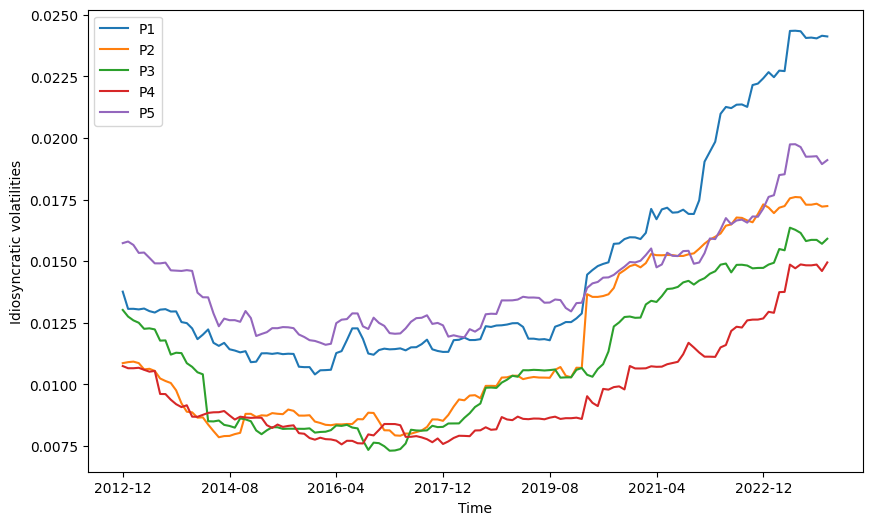

In [44]:
ax=idio_vol[70:].plot()
ax.figure.set_size_inches(10, 6)
ax.set_ylabel('Idiosyncratic volatilities')  # Replace 'Index' with your desired x-axis label
ax.set_xlabel('Time')  # Replace 'Cumulative Product' with your desired y-axis label

## Event study, SolarWind

### compile daily returns

In [45]:
file_path = 'Financial_ratios/returns_daily.csv.gz'
returns_table=pd.read_csv(file_path)
returns_table.set_index('date', inplace=True)

### convert monthly to daily

In [46]:
#available:

#dict_P1_P5_composition, dict_P1_P5_caps
#dict_P1_P20_composition, dict_P1_P20_caps
#returns_table


In [47]:
FF5_daily=get_FF_5_daily_factors()
FF5_daily["Mkt"]=FF5_daily["Mkt-RF"]+FF5_daily["RF"]
Mkt=FF5_daily[["Mkt"]]

In [48]:
def convert_monthly_to_daily(df):
    # Initialize an empty list to store the new rows
    new_rows = []
    
    # Loop through each index and row in the original DataFrame
    for idx, row in df.iterrows():
        # Create new indices for each row with zero-padded numbers
        for i in range(1, 32):
            new_index = f"{idx}-{i:02d}"
            new_rows.append((new_index, row.values))
    
    # Create a new DataFrame from the list of new rows
    new_df = pd.DataFrame(new_rows, columns=['Index', 'Values']).set_index('Index')
    
    # Expand the 'Values' column back into individual columns
    new_df = pd.DataFrame(new_df['Values'].tolist(), index=new_df.index, columns=df.columns)

    Mask_daily=get_FF_5_daily_factors()[[]]

    new_df=pd.merge(new_df, Mask_daily, left_index=True, right_index=True, how='inner')
    #new_df=new_df.drop(columns=['Mkt-RF'])
    return new_df


In [49]:
def to_daily_dict(dico):
    daily_dico={}
    for key in tqdm(dico.keys(), desc="Processing ..."):
        daily_dico[key]=convert_monthly_to_daily(dico[key])

    return daily_dico

In [50]:
def returns_sub_portfolio(list_ticker,date,mkt_strat):
    try:
        tot_market_caps=0
        array_weight=[]
        return_array=[]
        for tick in list_ticker:
            array_weight.append(mkt_strat.loc[date, tick])
            tot_market_caps+=mkt_strat.loc[date, tick]
    
            return_array.append(returns_table.loc[date, tick])
    
        array_weight=np.array(array_weight)/tot_market_caps
        return_array=np.array(return_array)

        return_array[np.isnan(return_array)]=0
        array_weight[np.isnan(return_array)]=0
    
       
        return np.sum(return_array*array_weight)

    except:
        return np.nan
        

In [51]:
#create daily portfolio 

def daily_portfolio(df_composition,df_caps):
    #df_composition and df_caps must be at day frequency

    list_name_p=df_composition.columns.to_list()

    df_returns=pd.DataFrame(index=df_composition.index, columns=df_composition.columns.to_list())

    for class_p in tqdm(list_name_p, desc="...Processing P."):
        for date in df_composition.index:

            
            df_returns.loc[date, class_p]=returns_sub_portfolio(df_composition.loc[date, class_p],date,df_caps)

        
    return df_returns
        

In [52]:
need_to_compile=False

In [53]:
if need_to_compile:
    dict_P1_P5_composition_daily =to_daily_dict(dict_P1_P5_composition)
    dict_P1_P5_caps_daily        =to_daily_dict(dict_P1_P5_caps)
    dict_P1_P20_composition_daily=to_daily_dict(dict_P1_P20_composition)
    dict_P1_P20_caps_daily       =to_daily_dict(dict_P1_P20_caps)

In [54]:
allowed=['Overall','preparation_and_reconaissance','persistence_and_evasion','credential_movement','command_and_data_manipulation']

In [55]:
if need_to_compile:
    #get daily return for P1 ot P5
    dict_P1_P5_returns_daily={}
    for key in tqdm(dict_P1_P5_caps_daily.keys(), desc="Processing cyberfolios..."):
        if key in allowed:
            dict_P1_P5_returns_daily[key]=daily_portfolio(dict_P1_P5_composition_daily[key],dict_P1_P5_caps_daily[key])

In [56]:
if need_to_compile:
    #get daily return for P1 ot P5
    dict_P1_P20_returns_daily={}
    for key in tqdm(dict_P1_P20_caps_daily.keys(), desc="Processing cyberfolios..."):
        if key in allowed:
            dict_P1_P20_returns_daily[key]=daily_portfolio(dict_P1_P20_composition_daily[key],dict_P1_P20_caps_daily[key])

In [57]:
if need_to_compile:
    # Assuming your dictionary is named df_dict
    with open('dict_daily_returns/dict_P1_P20_returns_daily.pkl', 'wb') as f:
        pickle.dump(dict_P1_P20_returns_daily, f)

    # Assuming your dictionary is named df_dict
    with open('dict_daily_returns/dict_P1_P5_returns_daily.pkl', 'wb') as f:
        pickle.dump(dict_P1_P5_returns_daily, f)

In [58]:
if not(need_to_compile):
    # Load the dictionary from the pickle file
    with open('dict_daily_returns/dict_P1_P20_returns_daily.pkl', 'rb') as f:
        dict_P1_P20_returns_daily = pickle.load(f)

    # Load the dictionary from the pickle file
    with open('dict_daily_returns/dict_P1_P5_returns_daily.pkl', 'rb') as f:
        dict_P1_P5_returns_daily = pickle.load(f)

    print("Extracted!")

    

Extracted!


In [59]:
Mkt_daily=get_FF_5_daily_factors()

In [60]:
Mkt_daily["Mkt"]=Mkt_daily["Mkt-RF"]+Mkt_daily["RF"]
Mkt_daily=Mkt_daily[["Mkt","Mkt-RF","RF"]].copy()
Mkt_daily.rename(columns={"Mkt-RF":"Mkt-rf","RF":"rf"},inplace=True)

## Event study: Overall P1 to P5 

### fct

In [61]:
df_event=dict_P1_P5_returns_daily["Overall"].copy(deep=True)
df_event["P5-P1"]=df_event["P5"]-df_event["P1"]

In [62]:
df_event=pd.merge(df_event,Mkt_daily, left_index=True, right_index=True, how='outer')
df_to_plot=df_event.copy(deep=True)

In [63]:
df_event=df_event[14000:14500]

In [64]:
#df_event[463:] 463: 2020-12-14

In [65]:
df_event=df_event[213:467]

In [66]:
# Create the gamma_2 column
df_event['gamma_2'] = df_event.index.isin(["2020-12-11", "2020-12-14", "2020-12-15", "2020-12-16", "2020-12-17"]).astype(int)

# Create the gamma_2 column
df_event['gamma_1'] = df_event.index.isin(["2020-12-11", "2020-12-14", "2020-12-15"]).astype(int)



In [67]:
df_event.loc["2020-12-16","gamma_1"]=np.nan
df_event.loc["2020-12-17","gamma_1"]=np.nan

In [68]:
display(df_event)

,P1,P2,P3,P4,P5,P5-P1,Mkt,Mkt-rf,rf,gamma_2,gamma_1
2019-12-17,0.001891,-0.000122,0.000923,0.002117,-0.000032,-0.001923,0.00107,0.0010,0.00007,0,0.0
2019-12-18,0.000858,0.002355,-0.000412,-0.001794,0.000682,-0.000176,-0.00043,-0.0005,0.00007,0,0.0
2019-12-19,0.002517,0.00357,0.002334,0.004622,0.007221,0.004704,0.00437,0.0043,0.00007,0,0.0
2019-12-20,0.004295,0.006765,0.004548,0.004461,0.00511,0.000815,0.00487,0.0048,0.00007,0,0.0
2019-12-23,0.000544,0.000675,0.000761,0.001294,0.000904,0.00036,0.00107,0.0010,0.00007,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-11,-0.001134,-0.001729,-0.002864,-0.00376,0.000145,0.00128,-0.00200,-0.0020,0.00000,1,1.0
2020-12-14,-0.012345,-0.005374,-0.006046,-0.00195,0.002784,0.015129,-0.00280,-0.0028,0.00000,1,1.0
2020-12-15,0.015143,0.014135,0.015305,0.011313,0.013125,-0.002018,0.01280,0.0128,0.00000,1,1.0
2020-12-16,-0.004386,-0.001267,-0.004468,-0.002199,0.00775,0.012136,0.00170,0.0017,0.00000,1,NaN


In [69]:
g1={}
g2={}

for p in ["P1","P2","P3","P4","P5","P5-P1"]:
    X = df_event[:-2][['Mkt', 'gamma_1']].astype(float)
    y = df_event[:-2][p].astype(float)
    
    # Add a constant to the independent variables
    X = sm.add_constant(X)
    
    # Fit the OLS model
    model = sm.OLS(y, X).fit()
    
    gamma_1_coeff = model.params['gamma_1']*100
    gamma_1_tstat = model.tvalues['gamma_1']
    gamma_1_pvalue = model.pvalues['gamma_1']

    g1[p]=[gamma_1_coeff, gamma_1_tstat, gamma_1_pvalue]



    X = df_event[['Mkt', 'gamma_2']].astype(float)
    y = df_event[p].astype(float)
    
    # Add a constant to the independent variables
    X = sm.add_constant(X)
    
    # Fit the OLS model
    model = sm.OLS(y, X).fit()
    
    gamma_2_coeff = model.params['gamma_2']*100
    gamma_2_tstat = model.tvalues['gamma_2']
    gamma_2_pvalue = model.pvalues['gamma_2']

    g2[p]=[gamma_2_coeff, gamma_2_tstat, gamma_2_pvalue]

### results

In [70]:
df_result_gamma1=pd.DataFrame(g1,index=["gamma_dummy1","t-stat","p_value"]).round(3)
display(df_result_gamma1)

,P1,P2,P3,P4,P5,P5-P1
gamma_dummy1,-0.146,0.001,-0.021,-0.103,0.206,0.352
t-stat,-0.311,0.002,-0.058,-0.342,0.616,0.450
p_value,0.756,0.999,0.953,0.732,0.539,0.653


In [71]:
df_result_gamma2=pd.DataFrame(g2,index=["gamma_dummy2","t-stat","p_value"]).round(3)
display(df_result_gamma2)

,P1,P2,P3,P4,P5,P5-P1
gamma_dummy2,-0.197,-0.040,-0.178,-0.051,0.194,0.390
t-stat,-0.540,-0.115,-0.626,-0.220,0.748,0.644
p_value,0.590,0.908,0.532,0.826,0.455,0.520


In [72]:
df_to_plot=df_to_plot[["P1","P2","P3","P4","P5","P5-P1"]]

Text(0.5, 0, 'Time')

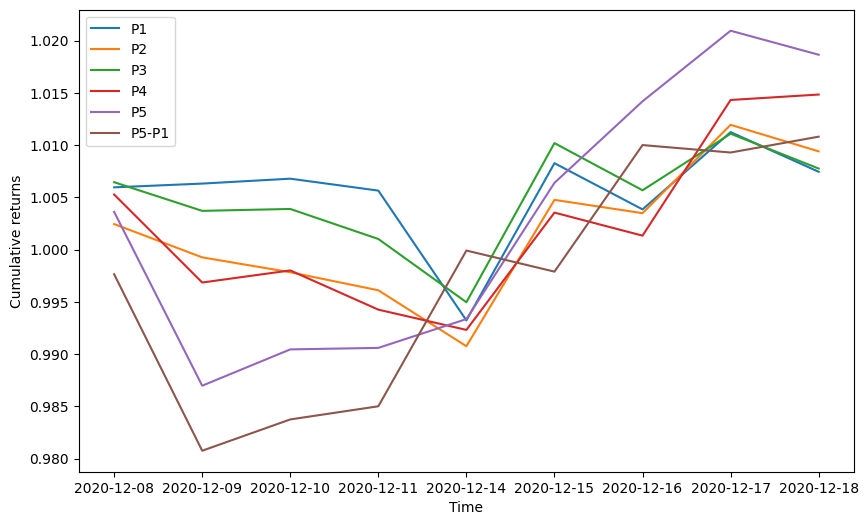

In [73]:
df_to_plot=df_to_plot+1
ax=df_to_plot[14463-4:14463+5].cumprod().plot()

ax.figure.set_size_inches(10, 6)
ax.set_ylabel('Cumulative returns')  # Replace 'Index' with your desired x-axis label
ax.set_xlabel('Time')  # Replace 'Cumulative Product' with your desired y-axis label

## Event study: all P20 

### fct

In [74]:
liste_dfe=[]
for cyb in allowed:

    dfe=dict_P1_P20_returns_daily[cyb][["P20"]].copy(deep=True)
    dfe.rename(columns={"P20":cyb},inplace=True)
    liste_dfe.append(dfe)
    

df_event=pd.concat(liste_dfe, axis=1)

In [75]:
display(df_event)

,Overall,preparation_and_reconaissance,persistence_and_evasion,credential_movement,command_and_data_manipulation
2007-02-01,NaN,NaN,NaN,NaN,NaN
2007-02-02,NaN,NaN,NaN,NaN,NaN
2007-02-05,NaN,NaN,NaN,NaN,NaN
2007-02-06,NaN,NaN,NaN,NaN,NaN
2007-02-07,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2023-12-22,0.001345,0.002098,0.001617,0.000132,0.000594
2023-12-26,0.005256,0.003007,0.004491,0.004055,0.005306
2023-12-27,0.000788,-0.000939,0.00019,0.001475,-0.000092
2023-12-28,0.000563,0.000844,0.001469,0.000375,0.000543


In [76]:
df_event=pd.merge(df_event,Mkt_daily, left_index=True, right_index=True, how='outer')
df_to_plot=df_event.copy(deep=True)
df_event=df_event[14000:14500]
df_event=df_event[213:467]
# Create the gamma_2 column
df_event['gamma_2'] = df_event.index.isin(["2020-12-11", "2020-12-14", "2020-12-15", "2020-12-16", "2020-12-17"]).astype(int)

# Create the gamma_2 column
df_event['gamma_1'] = df_event.index.isin(["2020-12-11", "2020-12-14", "2020-12-15"]).astype(int)

df_event.loc["2020-12-16","gamma_1"]=np.nan
df_event.loc["2020-12-17","gamma_1"]=np.nan

In [77]:
display(df_event)

,Overall,preparation_and_reconaissance,persistence_and_evasion,credential_movement,command_and_data_manipulation,Mkt,Mkt-rf,rf,gamma_2,gamma_1
2019-12-17,-0.002714,-0.001117,-0.002721,-0.004284,-0.002256,0.00107,0.0010,0.00007,0,0.0
2019-12-18,0.004018,0.003761,0.004918,0.005104,0.003325,-0.00043,-0.0005,0.00007,0,0.0
2019-12-19,0.009702,0.009648,0.01059,0.009204,0.010068,0.00437,0.0043,0.00007,0,0.0
2019-12-20,0.004856,0.004833,0.006057,0.006534,0.007639,0.00487,0.0048,0.00007,0,0.0
2019-12-23,0.000917,0.000025,0.00129,0.000495,0.000775,0.00107,0.0010,0.00007,0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-12-11,0.000271,0.003448,0.004024,0.004511,0.003733,-0.00200,-0.0020,0.00000,1,1.0
2020-12-14,0.004886,0.002416,0.006747,0.005767,0.006301,-0.00280,-0.0028,0.00000,1,1.0
2020-12-15,0.007763,0.004995,0.004819,0.004543,0.006007,0.01280,0.0128,0.00000,1,1.0
2020-12-16,0.00559,0.011665,0.012003,0.015073,0.010624,0.00170,0.0017,0.00000,1,NaN


In [78]:
g1={}
g2={}

for p in ["Overall","preparation_and_reconaissance","persistence_and_evasion","credential_movement","command_and_data_manipulation"]:
    X = df_event[:-2][['Mkt', 'gamma_1']].astype(float)
    y = df_event[:-2][p].astype(float)
    
    # Add a constant to the independent variables
    X = sm.add_constant(X)
    
    # Fit the OLS model
    model = sm.OLS(y, X).fit()
    
    gamma_1_coeff = model.params['gamma_1']*100
    gamma_1_tstat = model.tvalues['gamma_1']
    gamma_1_pvalue = model.pvalues['gamma_1']

    g1[p]=[gamma_1_coeff, gamma_1_tstat, gamma_1_pvalue]



    X = df_event[['Mkt', 'gamma_2']].astype(float)
    y = df_event[p].astype(float)
    
    # Add a constant to the independent variables
    X = sm.add_constant(X)
    
    # Fit the OLS model
    model = sm.OLS(y, X).fit()
    
    gamma_2_coeff = model.params['gamma_2']*100
    gamma_2_tstat = model.tvalues['gamma_2']
    gamma_2_pvalue = model.pvalues['gamma_2']

    g2[p]=[gamma_2_coeff, gamma_2_tstat, gamma_2_pvalue]

### results

In [79]:
df_result_gamma1=pd.DataFrame(g1,index=["gamma_dummy1","t-stat","p_value"]).round(3)
df_result_gamma1.rename(columns={"Overall":"overall","preparation_and_reconaissance":"preparation and reconaissance","persistence_and_evasion":"persistence and evasion","credential_movement":"credential movement","command_and_data_manipulation":"command and data manipulation"},inplace=True)
display(df_result_gamma1)

,overall,preparation and reconaissance,persistence and evasion,credential movement,command and data manipulation
gamma_dummy1,0.078,0.036,0.163,0.141,0.207
t-stat,0.151,0.082,0.301,0.255,0.427
p_value,0.880,0.935,0.764,0.799,0.670


In [80]:
df_result_gamma2=pd.DataFrame(g2,index=["gamma_dummy2","t-stat","p_value"]).round(3)
df_result_gamma2.rename(columns={"Overall":"overall","preparation_and_reconaissance":"preparation and reconaissance","persistence_and_evasion":"persistence and evasion","credential_movement":"credential movement","command_and_data_manipulation":"command and data manipulation"},inplace=True)
display(df_result_gamma2)

,overall,preparation and reconaissance,persistence and evasion,credential movement,command and data manipulation
gamma_dummy2,0.055,0.146,0.228,0.312,0.227
t-stat,0.138,0.429,0.543,0.724,0.603
p_value,0.890,0.668,0.588,0.470,0.547


In [81]:
df_to_plot=df_to_plot[["Overall","preparation_and_reconaissance","persistence_and_evasion","credential_movement","command_and_data_manipulation"]]
df_to_plot.rename(columns={"Overall":"overall","preparation_and_reconaissance":"preparation and reconaissance","persistence_and_evasion":"persistence and evasion","credential_movement":"credential movement","command_and_data_manipulation":"command and data manipulation"},inplace=True)

Text(0.5, 0, 'Time')

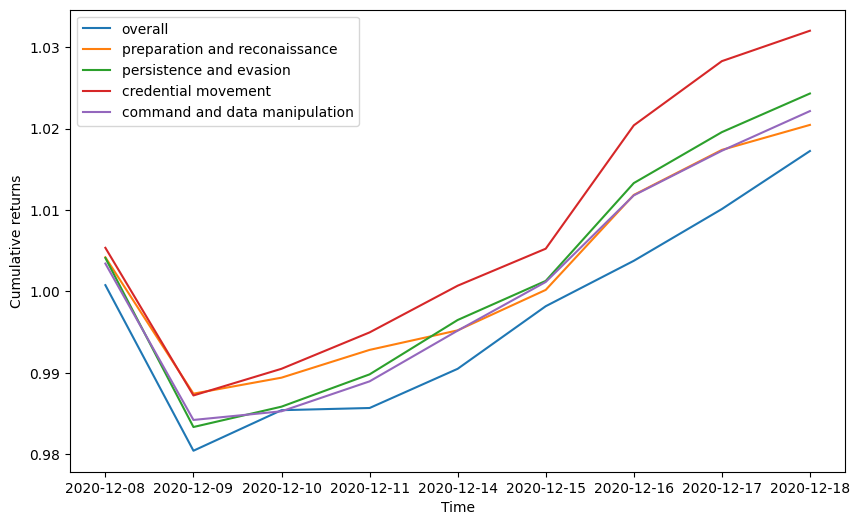

In [82]:
df_to_plot=df_to_plot+1
ax=df_to_plot[14463-4:14463+5].cumprod().plot()
ax.figure.set_size_inches(10, 6)
ax.set_ylabel('Cumulative returns')  # Replace 'Index' with your desired x-axis label
ax.set_xlabel('Time')  # Replace 'Cumulative Product' with your desired y-axis label

## Event study: all P5 

### fct

In [83]:
liste_dfe=[]
for cyb in allowed:

    dfe=dict_P1_P5_returns_daily[cyb][["P5"]].copy(deep=True)
    dfe.rename(columns={"P5":cyb},inplace=True)
    liste_dfe.append(dfe)
    

df_event=pd.concat(liste_dfe, axis=1)

In [84]:
display(df_event)

,Overall,preparation_and_reconaissance,persistence_and_evasion,credential_movement,command_and_data_manipulation
2007-02-01,NaN,NaN,NaN,NaN,NaN
2007-02-02,NaN,NaN,NaN,NaN,NaN
2007-02-05,NaN,NaN,NaN,NaN,NaN
2007-02-06,NaN,NaN,NaN,NaN,NaN
2007-02-07,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2023-12-22,0.000525,0.00088,0.000708,0.000872,0.001746
2023-12-26,0.00374,0.003807,0.004019,0.003303,0.005209
2023-12-27,0.001912,0.001366,0.001948,0.000748,0.002316
2023-12-28,0.00013,0.000232,0.000107,0.001371,-0.000116


In [85]:
df_event=pd.merge(df_event,Mkt_daily, left_index=True, right_index=True, how='outer')
df_to_plot=df_event.copy(deep=True)
df_event=df_event[14000:14500]
df_event=df_event[213:467]
# Create the gamma_2 column
df_event['gamma_2'] = df_event.index.isin(["2020-12-11", "2020-12-14", "2020-12-15", "2020-12-16", "2020-12-17"]).astype(int)

# Create the gamma_2 column
df_event['gamma_1'] = df_event.index.isin(["2020-12-11", "2020-12-14", "2020-12-15"]).astype(int)

df_event.loc["2020-12-16","gamma_1"]=np.nan
df_event.loc["2020-12-17","gamma_1"]=np.nan

In [86]:
display(df_event)

,Overall,preparation_and_reconaissance,persistence_and_evasion,credential_movement,command_and_data_manipulation,Mkt,Mkt-rf,rf,gamma_2,gamma_1
2019-12-17,-0.000032,-0.000367,-0.000512,0.001166,-0.000276,0.00107,0.0010,0.00007,0,0.0
2019-12-18,0.000682,0.001078,0.001102,0.000214,-0.000232,-0.00043,-0.0005,0.00007,0,0.0
2019-12-19,0.007221,0.007319,0.007834,0.007133,0.007042,0.00437,0.0043,0.00007,0,0.0
2019-12-20,0.00511,0.004685,0.004357,0.004668,0.005213,0.00487,0.0048,0.00007,0,0.0
2019-12-23,0.000904,0.001188,0.001716,0.000991,0.001014,0.00107,0.0010,0.00007,0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-12-11,0.000145,-0.000911,-0.00045,-0.000341,-0.000289,-0.00200,-0.0020,0.00000,1,1.0
2020-12-14,0.002784,0.001578,0.004498,0.002937,0.002706,-0.00280,-0.0028,0.00000,1,1.0
2020-12-15,0.013125,0.014605,0.012093,0.013276,0.007675,0.01280,0.0128,0.00000,1,1.0
2020-12-16,0.00775,0.006478,0.007037,0.007893,0.006773,0.00170,0.0017,0.00000,1,NaN


In [87]:
g1={}
g2={}

for p in ["Overall","preparation_and_reconaissance","persistence_and_evasion","credential_movement","command_and_data_manipulation"]:
    X = df_event[:-2][['Mkt', 'gamma_1']].astype(float)
    y = df_event[:-2][p].astype(float)
    
    # Add a constant to the independent variables
    X = sm.add_constant(X)
    
    # Fit the OLS model
    model = sm.OLS(y, X).fit()
    
    gamma_1_coeff = model.params['gamma_1']*100
    gamma_1_tstat = model.tvalues['gamma_1']
    gamma_1_pvalue = model.pvalues['gamma_1']

    g1[p]=[gamma_1_coeff, gamma_1_tstat, gamma_1_pvalue]



    X = df_event[['Mkt', 'gamma_2']].astype(float)
    y = df_event[p].astype(float)
    
    # Add a constant to the independent variables
    X = sm.add_constant(X)
    
    # Fit the OLS model
    model = sm.OLS(y, X).fit()
    
    gamma_2_coeff = model.params['gamma_2']*100
    gamma_2_tstat = model.tvalues['gamma_2']
    gamma_2_pvalue = model.pvalues['gamma_2']

    g2[p]=[gamma_2_coeff, gamma_2_tstat, gamma_2_pvalue]

### results

In [88]:
df_result_gamma1=pd.DataFrame(g1,index=["gamma_dummy1","t-stat","p_value"]).round(3)
df_result_gamma1.rename(columns={"Overall":"overall","preparation_and_reconaissance":"preparation and reconaissance","persistence_and_evasion":"persistence and evasion","credential_movement":"credential movement","command_and_data_manipulation":"command and data manipulation"},inplace=True)
display(df_result_gamma1)

,overall,preparation and reconaissance,persistence and evasion,credential movement,command and data manipulation
gamma_dummy1,0.206,0.182,0.192,0.198,0.009
t-stat,0.616,0.639,0.533,0.565,0.029
p_value,0.539,0.523,0.594,0.572,0.977


In [89]:
df_result_gamma2=pd.DataFrame(g2,index=["gamma_dummy2","t-stat","p_value"]).round(3)
df_result_gamma2.rename(columns={"Overall":"overall","preparation_and_reconaissance":"preparation and reconaissance","persistence_and_evasion":"persistence and evasion","credential_movement":"credential movement","command_and_data_manipulation":"command and data manipulation"},inplace=True)
display(df_result_gamma2)

,overall,preparation and reconaissance,persistence and evasion,credential movement,command and data manipulation
gamma_dummy2,0.194,0.181,0.189,0.200,0.081
t-stat,0.748,0.818,0.675,0.735,0.336
p_value,0.455,0.414,0.500,0.463,0.737


In [90]:
df_to_plot=df_to_plot[["Overall","preparation_and_reconaissance","persistence_and_evasion","credential_movement","command_and_data_manipulation"]]
df_to_plot.rename(columns={"Overall":"overall","preparation_and_reconaissance":"preparation and reconaissance","persistence_and_evasion":"persistence and evasion","credential_movement":"credential movement","command_and_data_manipulation":"command and data manipulation"},inplace=True)

Text(0.5, 0, 'Time')

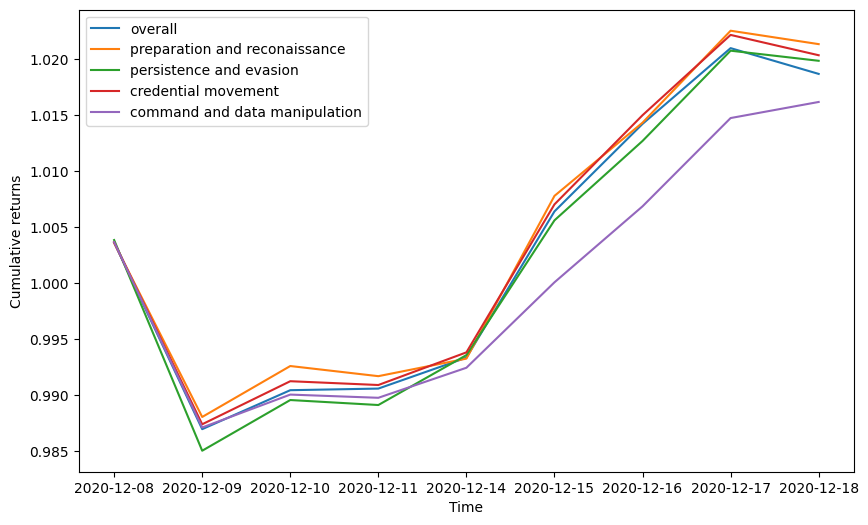

In [91]:
df_to_plot=df_to_plot+1

ax = df_to_plot[14463-4:14463+5].cumprod().plot()
ax.figure.set_size_inches(10, 6)

ax.set_ylabel('Cumulative returns')  # Replace 'Index' with your desired x-axis label
ax.set_xlabel('Time')  # Replace 'Cumulative Product' with your desired y-axis label